In [194]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skopt import gp_minimize
from skopt.plots import plot_convergence, plot_gaussian_process
from scratch3 import *

from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

seed = 42
data = load_diabetes()
X, y = data.data, data.target
df = pd.concat([pd.DataFrame(X), pd.DataFrame(y, columns=['y'])], axis=1);df

X_train, X_test, y_train, y_test = getData(list(range(X.shape[1])), 'y', df, 0.15, seed)

def f(param) -> float:
    dico = dict(zip(list(parameters.keys()), param))
    print(dico)
    model = Model(RandomForestRegressor, X_train, X_test, y_train, y_test, parameters=dico)
    model.process({r2_score: {}}, save=False, write=False)
    print(-model.metrics['r2_score'])
    return -model.metrics['r2_score']

In [184]:
# parameters = {'n_estimators': [10, 20, 30, 40], 'min_samples_split': (2,4,6,8,10), 
#               'min_weight_fraction_leaf': (0., 0.5), 'random_state': [seed], }  # rf
parameters = {'n_estimators': (10, 20, 30, 40), 'min_samples_split': (2,10), 'min_weight_fraction_leaf': (0., 0.5)}  # rf
# f(param={'random_state': seed})

In [193]:
res = gp_minimize(f,                  # the function to minimize
#                   [(-2.0, 2.0)],      # the bounds on each dimension of x
                  list(parameters.values()),      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=10,         # the number of evaluations of f
                  n_random_starts=3,  # the number of random initialization points
                  random_state=1234,   # the random seed
                  initial_point_generator='lhs', n_jobs=-1)

{'n_estimators': 40, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.2801194218935398}
-0.3492390032883602
{'n_estimators': 10, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.4103905931476031}
-0.36716886918900427
{'n_estimators': 30, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.04366416299189189}
-0.4725186844419559
{'n_estimators': 20, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0}
-0.4547218991279771
{'n_estimators': 10, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0}
-0.44768522329314575
{'n_estimators': 40, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0966269409268986}
-0.4665051578827928
{'n_estimators': 40, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.045899492264405435}
-0.46692523658272467
{'n_estimators': 40, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.5}
0.007759358836638031
{'n_estimators': 10, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.16719481264277902}
-0.40823564836410153
{'n_estimators':

In [190]:
print(res.func_vals)
print(res.x)

[-0.34808525 -0.30455937 -0.4804852  -0.32892633  0.00468199 -0.47459087
 -0.35598077 -0.43631139 -0.43187178 -0.39704074]
[30, 10, 0.04366416299189189]


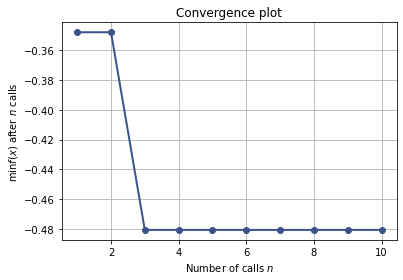

In [187]:
plot_convergence(res);

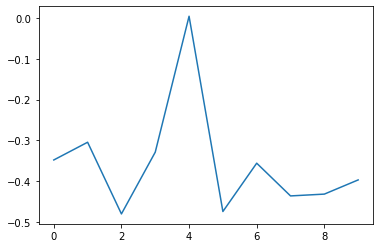

In [189]:
# plt.scatter(np.array(res.x_iters)[:,1], res.func_vals);
plt.plot(res.func_vals);

AssertionError: Space dimension must be 1

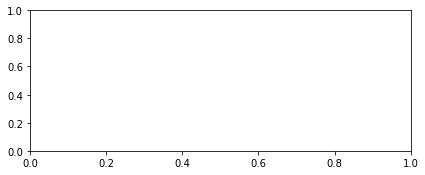

In [160]:
plt.figure(figsize=(15,15))
for n_iter in range(5):
    # Plot true function.
    plt.subplot(5, 2, 2*n_iter+1)

    if n_iter == 0:
        show_legend = True
    else:
        show_legend = False

    ax = plot_gaussian_process(res, n_calls=n_iter,
                               objective=f,
                               noise_level=0,
                               show_legend=show_legend, show_title=False,
                               show_next_point=False, show_acq_func=False)
    ax.set_ylabel("")
    ax.set_xlabel("")
    # Plot EI(x)
    plt.subplot(5, 2, 2*n_iter+2)
    ax = plot_gaussian_process(res, n_calls=n_iter,
                               show_legend=show_legend, show_title=False,
                               show_mu=False, show_acq_func=True,
                               show_observations=False,
                               show_next_point=True)
    ax.set_ylabel("")
    ax.set_xlabel("")

plt.show()